# Задание 2

В <a href="https://stepik.org/lesson/196432/step/14">задании на исследование пересечений графиков функций с помощью matplotlib</a> мы изучали пару интересных функций:

$ f(x) = sin(\frac{x}{5}) \cdot e^{\frac{x}{10}} + 5 \cdot e^{-\frac{x}{2}}$

и

$g(x) = 1 - x^3 + x^5$

Теперь у нас есть более удобный инструмент, позволяющий работать с графиками интерактивно, менять масштаб, двигать, не перестраивая результат ячейки, поэтому имеет смысл к ним вернуться.

Не все заметили (и это было не страшно), что эти 2 функции имеют бесконечно много точек пересечений.

В этом задании необходимо построить 1 фигуру, содержащую несколько изображений. В результате должна получиться 1 фигура следующего вида:

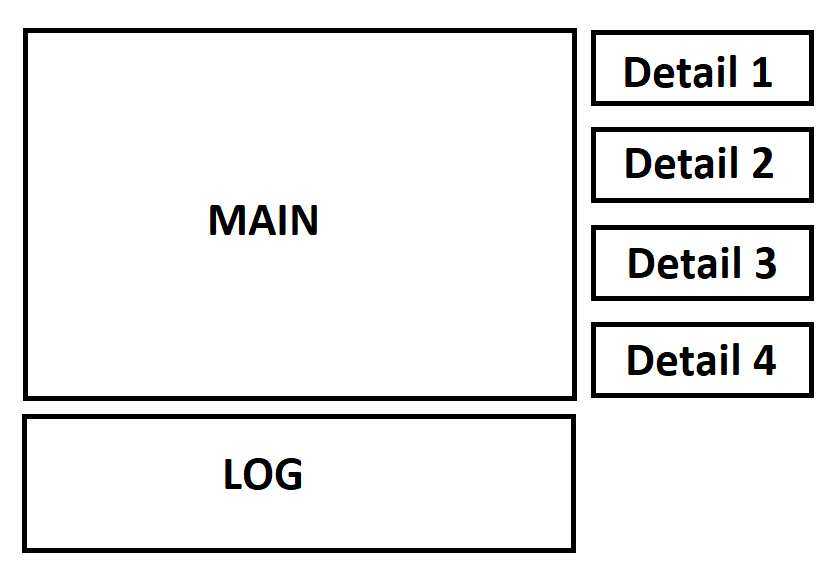

Во всех областях должны быть показаны по 2 графика (f(x) и g(x)). 

Отличаться будет масштаб осей и интервал аргументов и функций, которые выводятся.

- MAIN - основное изображение - линейный масштаб, x в интервале от 0 до 500

- LOG - логарифмический масштаб вдоль оси Y. X в интервале от 0 до 500

- Detail (1-4) - 4 графика с линейным масштабом и таким интервалом x и y, чтобы было видно хотя бы по 1 точке пересечения

Таким образом, мы эмулируем ситуацию одного большого окна для детального просмотра, одного вспомогательного окна с изменённым масштабом и нескольких окон, акцентирующих внимание на важных деталях. При этом, если вы используете достаточно много точек в основном масштабе, то в интервактивном режиме вы можете приблизить какой-то интервал, соответсвующий, например, окнам detail и убедиться, что графики действительно пересекаются.

Убедитесь, что на всех фигурах кривые, соответсвующие одной функции выводятся одним цветом.

Легенду и подписи выводить не обязательно.

Рекомендуется изменить отступ от краёв фигуры и, возможно, размер самой фигуры.

*Примечание. Чтобы задать логарифмический масштаб используйте атрибут <code>type="log"</code> метода update_yaxes, не забыв применить его к конкретной ячейке фигуры с графиком.*

In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

In [2]:
x=np.linspace(0,500, 500*10+1)

In [3]:
def f(x):
    f=np.sin(x/5)*np.e**(x/10)+5*np.e**(-x/2)
    return f

def g(x):
    g=1-x**3+x**5
    return g

In [4]:
fig = make_subplots(rows=5, cols=2,
                    specs=[[{"rowspan": 4}, {}], [None, {}],[None, {}], [None, {}],[{}, {}]])

# main
fig.update_yaxes(range=[0, 10000000000000], zeroline=True, zerolinewidth=2, zerolinecolor='gray')
fig.update_xaxes(range=[0, 500], zeroline=True, zerolinewidth=2, zerolinecolor='gray')

# main
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)',line=dict(color='red')),1,1)
fig.add_trace(go.Scatter(x=x, y=g(x),  name='g(x)',line=dict(color='blue')),1,1)
# detail 1
fig.update_yaxes(range=[1*10**12, 5.5*10**12], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', row=1,col=2)
fig.update_xaxes(range=[284, 300], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', row=1,col=2)
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines',  name='f(x)',line=dict(color='red')), 1, 2)
fig.add_trace(go.Scatter(x=x, y=g(x), mode='lines',name='g(x)',line=dict(color='blue'),), 1, 2)
# detail 2
fig.update_yaxes(range=[1*10**12, 3*10**12], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', row=2,col=2)
fig.update_xaxes(range=[296, 298], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', row=2,col=2)
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines',  name='f(x)',line=dict(color='red')), 2, 2)
fig.add_trace(go.Scatter(x=x, y=g(x), mode='lines',name='g(x)',line=dict(color='blue'),), 2, 2)
# detail 3
fig.update_yaxes(range=[1*10**12, 9*10**12], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', row=3,col=2)
fig.update_xaxes(range=[310, 331], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', row=3,col=2)
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines',  name='f(x)',line=dict(color='red')), 3, 2)
fig.add_trace(go.Scatter(x=x, y=g(x), mode='lines',name='g(x)',line=dict(color='blue'),), 3, 2)
# detail 4
fig.update_yaxes(range=[5*10**12, 7*10**12], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', row=4,col=2)
fig.update_xaxes(range=[360, 362], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', row=4,col=2)
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines',  name='f(x)',line=dict(color='red')), 4, 2)
fig.add_trace(go.Scatter(x=x, y=g(x), mode='lines',name='g(x)',line=dict(color='blue'),), 4, 2)
# log 
fig.update_yaxes(range=[0, 25],zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', row=5,col=1,type="log")
fig.update_xaxes(range=[0, 500], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', row=5,col=1)
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines',  name='f(x)',line=dict(color='red')), 5, 1)
fig.add_trace(go.Scatter(x=x, y=g(x), mode='lines',name='g(x)',line=dict(color='blue'),), 5, 1)

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}",showlegend=False)
fig.show()

# 